### Problem or Business Understanding: 

- The business problem is predicting the next day trend of SPY using technical indicators. The aim is to provide investors with insights on whether the price of SPY is likely to increase or decrease in the future based on historical data and technical indicators.
- A data mining solution will address the business problem by identifying patterns and relationships between the technical indicators and the next day trend of SPY, enabling investors to make more informed investment decisions.

### <font color='grey'>_Data understanding and data preparation is done seperately in SPY_features in order to maintain the smooth workflow._</font>

### Data filteration

**Importing the data**: The data that has been prepared needs to be imported into a tool or framework for further analysis and modeling.

In [1]:
# Necessary imports
import pandas as pd
import numpy as np
import yfinance as yf

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#set the seaborn visualization style
sns.set()

In [2]:
# Load data from CSV file
df = pd.read_csv('SPY_10Y_features.csv', index_col='Date', parse_dates=True)
df.head()

,Open,High,Low,Close,Volume,LogReturn,ADX_14,ATR_14,RSI_14,WMA_14,EMA_10,SMA_20,WILLR_14,OBV
Date,,,,,,,,,,,,,,
2013-04-24,131.165979,131.556578,130.924965,131.207535,96781200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96781200.0
2013-04-25,131.589783,132.362674,131.390337,131.739380,131060600,0.004045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,227841800.0
2013-04-26,131.581460,131.805850,131.082820,131.506668,95918800,-0.001768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131923000.0
2013-04-29,131.864063,132.678497,131.656299,132.387634,88572800,0.006677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,220495800.0
2013-04-30,132.362721,132.736695,131.814219,132.703445,116010700,0.002383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,336506500.0


In [3]:
#We usually use log returs using Adj_close or closing price of instruments
df['LogReturn']=np.log(df['Close']).diff()

In [4]:
df['direction']=np.where(df['LogReturn']>0,1,-1) #-1 is sell and 1 is buy

In [5]:
features=['Volume','LogReturn']
label = 'direction'

In [6]:
#once the direction is calculated need to shift the rows to above because we are predicting next day return
df['direction']=df['direction'].shift(-1)

In [7]:
df['direction'].value_counts()

 1.0    1375
-1.0    1141
Name: direction, dtype: int64

<AxesSubplot:xlabel='LogReturn', ylabel='Volume'>

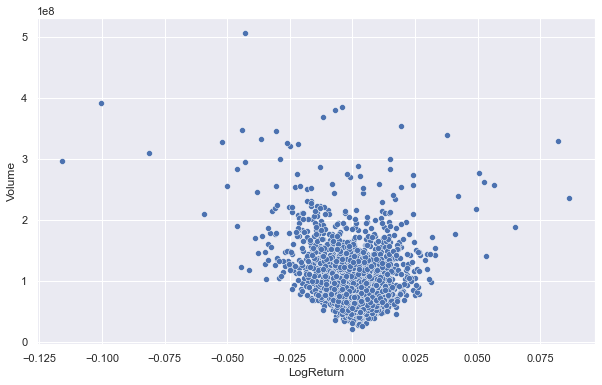

In [8]:
#scatter plot of returns and volume
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['LogReturn'],y=df['Volume'])

### Features Extraction

Extracting new features based on the existing ones

In [9]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'LogReturn', 'ADX_14',
       'ATR_14', 'RSI_14', 'WMA_14', 'EMA_10', 'SMA_20', 'WILLR_14', 'OBV',
       'direction'],
      dtype='object')

In [10]:
#out of many features i have selected few is just because whole together was not giving a required results
features_list=['ATR_14','RSI_14','WMA_14', 'OBV']

In [11]:
features_list

['ATR_14', 'RSI_14', 'WMA_14', 'OBV']

We will be using these features to predict the next day movement, not the close and volume columns.

In [12]:
#Removing NAN values if any in the data.
df.dropna(inplace=True)

In [13]:
df.head()

,Open,High,Low,Close,Volume,LogReturn,ADX_14,ATR_14,RSI_14,WMA_14,EMA_10,SMA_20,WILLR_14,OBV,direction
Date,,,,,,,,,,,,,,,
2013-06-03,136.152334,136.675905,135.179997,136.584488,168390700,0.005491,55.493109,1.423772,56.678841,137.464609,137.109351,137.004995,-73.634630,517530800.0,-1.0
2013-06-04,136.659268,137.207770,135.238153,135.927933,157631500,-0.004819,52.532322,1.462761,53.047465,137.229299,136.894547,137.078960,-85.959607,359899300.0,-1.0
2013-06-05,135.537362,135.811612,133.908494,134.024841,211737800,-0.014100,48.811914,1.502524,44.206331,136.753462,136.372783,137.023694,-98.236764,148161500.0,1.0
2013-06-06,133.966641,135.246478,133.177137,135.238159,200225500,0.009012,45.854934,1.543011,49.935277,136.477788,136.166488,136.998348,-71.881952,348387000.0,1.0
2013-06-07,136.168962,137.083119,135.578905,136.958466,188337800,0.012640,43.271108,1.564578,56.720822,136.452145,136.310484,137.078129,-48.412206,536724800.0,-1.0


Plotting features to visualize the data and understand.

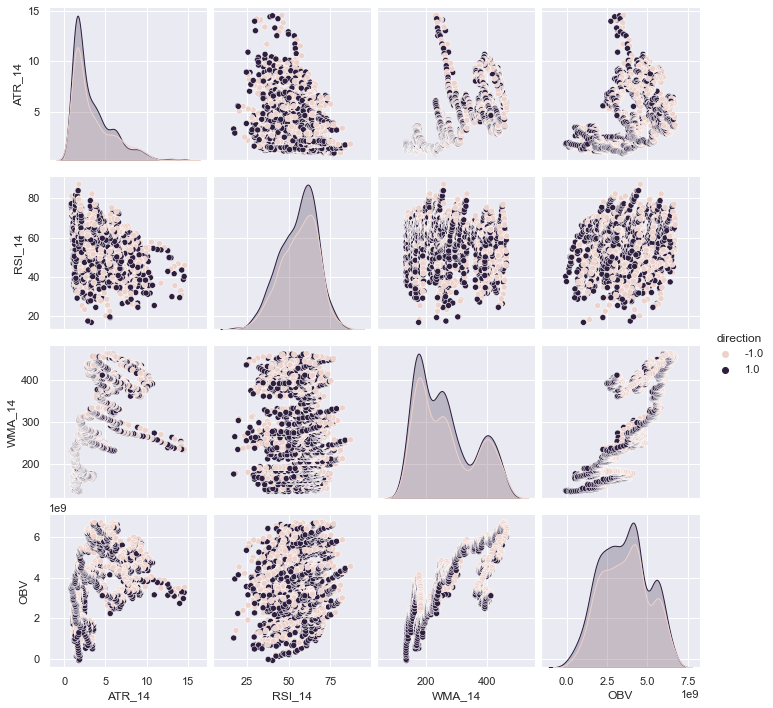

In [14]:
sns.pairplot(df[features_list+['direction']],hue='direction')

### Generating training and testing Dataset

In [15]:
df.index.min()

Timestamp('2013-06-03 00:00:00')

In [16]:
df.index.max()

Timestamp('2023-04-20 00:00:00')

In [17]:
start_year='2013'
cut_off_year='2020'

In [19]:
#Till 2020 its for training data and rest for testing

training_data = df.loc[:'2020']
testing_data = df.loc['2021':]

In [21]:
X_train = training_data[features_list].reset_index(drop=True)

Y_train = training_data['direction'].reset_index(drop=True)

X_test = testing_data[features_list].reset_index(drop=True)

Y_test = testing_data['direction'].reset_index(drop=True)

### Feature Scaling

Now almost ready to train our model and start predicting,But many algorithms requires normalized data, So we need to make sure that the data we feed to our model is normalized.

In [22]:
X_train.columns

Index(['ATR_14', 'RSI_14', 'WMA_14', 'OBV'], dtype='object')

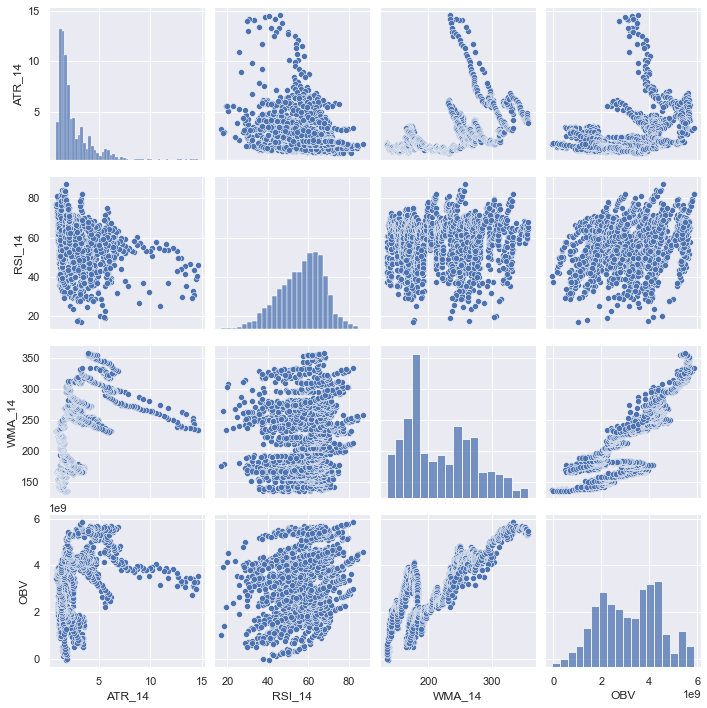

In [23]:
sns.pairplot(X_train[['ATR_14','RSI_14','WMA_14', 'OBV']])

From the above plot we can see that features have different distribution and there scales are different, Hence need to scale the data

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
#scaling the features

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

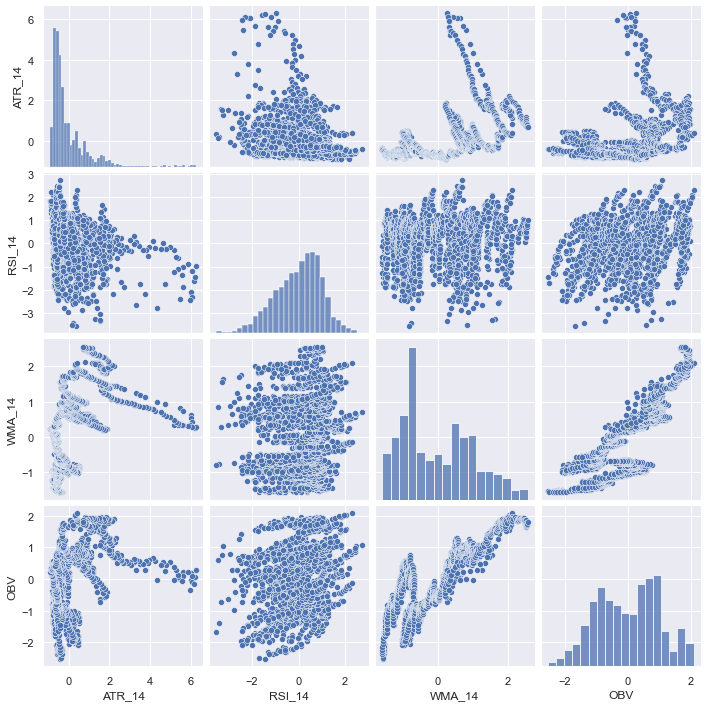

In [26]:
X_train_scaled_df =pd.DataFrame(X_train_scaled,columns=X_train.columns)
sns.pairplot(X_train_scaled_df[['ATR_14','RSI_14','WMA_14', 'OBV']])

From the above plot we can see that values are now scaled with mean 0 and std 1.

## Modeling:

This below code performs model training and hyperparameter tuning using GridSearchCV for multiple classification algorithms, including Decision Tree, Random Forest, Adaboost, Gradient Boosting, and SVM. It imports necessary libraries and data, defines the models and hyperparameters for tuning, performs the grid search for each model, and prints the results in a table. The results include the train accuracy, test accuracy, mean cross-validation accuracy, and best parameters for each model. Finally, the execution time is calculated and printed.

In [27]:
import time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from tabulate import tabulate

start_time = time.time()
# Define the models
models = {
    'CART': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Adaboost': AdaBoostClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True)
}

# Define the hyperparameters for tuning
params = {
    'CART': {'max_depth': [3, 5, 7],'criterion': ['gini', 'entropy']},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7],'criterion': ['gini', 'entropy']},
    'Adaboost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1, 10]},
    'Gradient Boosting': {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7]},
    'SVM': {'C': [0.001, 0.1, 1, 10], 'kernel': ['linear', 'rbf'],'gamma': [0.1, 1, 10],
    'class_weight': ['balanced', None]}
}

# Perform the grid search for each model
results = []
for model_name, model in models.items():
    grid_search = GridSearchCV(model, params[model_name], cv=10, scoring='accuracy')#, verbose=10)
    grid_search.fit(X_train_scaled, Y_train)
    Y_pred_train = grid_search.predict(X_train_scaled)
    Y_pred = grid_search.predict(X_test_scaled)
    train_acc = round(accuracy_score(Y_train, Y_pred_train), 4)
    test_acc = round(accuracy_score(Y_test, Y_pred), 4)
    mean_cv_acc = round(grid_search.best_score_, 4)
    best_params = grid_search.best_params_
    results.append([model_name, train_acc, test_acc, mean_cv_acc, best_params])

# Print the results in a table
headers = ['Model', 'Train Accuracy', 'Test Accuracy', 'Mean CV Accuracy', 'Best Parameters']
print(tabulate(results, headers=headers))
print()
print('###########################################_____##########################################################')
end_time = time.time()
total_time = end_time - start_time

print('Execution time:', total_time/60,'minutes')

Model                Train Accuracy    Test Accuracy    Mean CV Accuracy  Best Parameters
-----------------  ----------------  ---------------  ------------------  --------------------------------------------------------------------
CART                         0.5756           0.4913              0.539   {'criterion': 'entropy', 'max_depth': 3}
Random Forest                0.5714           0.4792              0.5296  {'criterion': 'gini', 'max_depth': 3, 'n_estimators': 200}
Adaboost                     0.561            0.4792              0.5463  {'learning_rate': 0.01, 'n_estimators': 50}
Gradient Boosting            0.652            0.4948              0.4919  {'max_depth': 3, 'n_estimators': 50}
SVM                          0.5552           0.5138              0.5552  {'C': 0.001, 'class_weight': None, 'gamma': 0.1, 'kernel': 'linear'}

###########################################_____##########################################################
Execution time: 6.740031385421753 minut

From the results SVM was better when compared with other results based on test Accuracy but further we use MCC and test error to select the model taking into account overall

This below code compares the performance of different machine learning models using metrics such as Matthews Correlation Coefficient, test error, and average probability. The models used in this code are decision tree, random forest, AdaBoost, gradient boosting, and support vector machine. The code trains and fits each model on the training data, makes predictions on the test data, and calculates the desired metrics. Finally, the results are displayed in a table format, showing the performance of each model on the metrics. The execution time is also displayed at the end.

In [28]:
#To compare the MCC, test error, and average probability of the models
from sklearn.metrics import matthews_corrcoef
start_time = time.time()
models = {
    'CART': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42,probability=True)
}

results = {
    'Model': [],
    'MCC': [],
    'Test Error': [],
    'Avg Probability': []
}

for name, model in models.items():
    # Fit the model and make predictions
    model.fit(X_train_scaled, Y_train)
    Y_pred = model.predict(X_test_scaled)
    Y_pred_train = model.predict(X_train_scaled)
    Y_prob = model.predict_proba(X_test_scaled)[:, 1]

    # Calculate metrics
    mcc = matthews_corrcoef(Y_test, Y_pred)
    test_error = 1 - accuracy_score(Y_test, Y_pred)
    avg_prob = np.mean(Y_prob)

    # Add results to dictionary
    results['Model'].append(name)
    results['MCC'].append(round(mcc, 4))
    results['Test Error'].append(round(test_error, 4))
    results['Avg Probability'].append(round(avg_prob, 4))

# Create a table of results
results_df = pd.DataFrame(results)
print(results_df)

end_time = time.time()
total_time = end_time - start_time
print()
print('Execution time:', total_time/60,'minutes')

               Model     MCC  Test Error  Avg Probability
0               CART -0.0024      0.5087           0.2232
1      Random Forest -0.0030      0.5035           0.4297
2           AdaBoost -0.0462      0.5225           0.4750
3  Gradient Boosting  0.0074      0.5087           0.2580
4                SVM  0.0000      0.4862           0.5636

Execution time: 0.03661038080851237 minutes


### Plotting modeling results

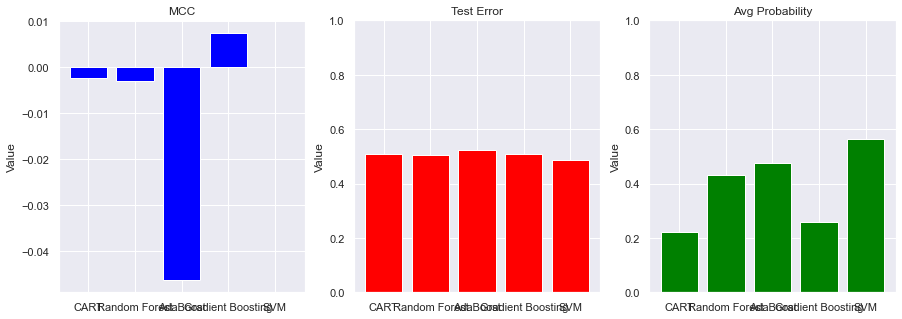

In [29]:
# Creating subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plotting MCC
axs[0].bar(results_df['Model'], results_df['MCC'],color='blue')
axs[0].set_title('MCC')

# Plotting Test Error
axs[1].bar(results_df['Model'], results_df['Test Error'],color='red')
axs[1].set_title('Test Error')

# Plotting Avg Probability
axs[2].bar(results_df['Model'], results_df['Avg Probability'],color='green')
axs[2].set_title('Avg Probability')

# Setting y-axis limits for Test Error and Avg Probability plots
axs[1].set_ylim([0, 1])
axs[2].set_ylim([0, 1])

# Setting y-axis labels for all plots
for ax in axs:
    ax.set_ylabel('Value')

# Showing the plot
plt.show()

Although the modeling did not perform well for this dataset, we can consider Gradient Boosting as a better model based on its MCC score and test error. We can further check the returns based on this model and conclude the appropriate modeling selection.

### Feature importance using Random Forest

Random Forest optimal parameters: {'criterion': 'gini', 'max_depth': 3, 'n_estimators': 200}
Feature ranking:
1. OBV: 0.30609613743769076
2. RSI_14: 0.25398468934613044
3. WMA_14: 0.24243901690477607
4. ATR_14: 0.1974801563114027


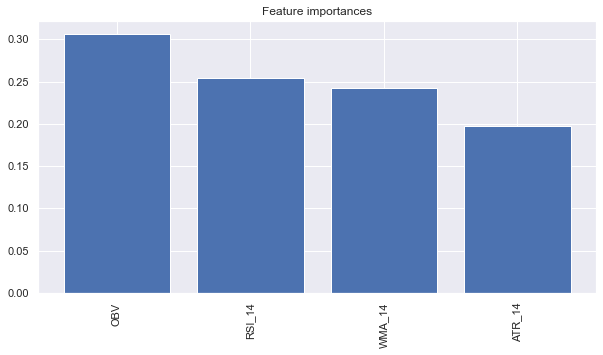

In [30]:
rf = RandomForestClassifier(random_state=42)
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7],'criterion': ['gini', 'entropy']}
rf_cv = GridSearchCV(rf, rf_params, cv=10)
rf_cv.fit(X_train_scaled, Y_train)
print("Random Forest optimal parameters: {}".format(rf_cv.best_params_))

# Train a random forest classifier with the optimal parameters
rf = RandomForestClassifier(random_state=42, **rf_cv.best_params_)
rf.fit(X_train_scaled, Y_train)

# Get feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
feature_names = features_list
print("Feature ranking:")
for f in range(X_train_scaled.shape[1]):
    print(f"{f+1}. {feature_names[indices[f]]}: {importances[indices[f]]}")

# Plot feature importances
plt.figure(figsize=(10,5))
plt.title("Feature importances")
plt.bar(range(X_train_scaled.shape[1]), importances[indices])
plt.xticks(range(X_train_scaled.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.show()


The ranking shows that OBV (On-Balance Volume) is the most important feature with a score of 0.306, followed by RSI_14 (Relative Strength Index) with a score of 0.254, WMA_14 (Weighted Moving Average) with a score of 0.242, and ATR_14 (Average True Range) with a score of 0.197. This information can be useful in understanding which features have the greatest impact on the model's predictions.

## Evaluation:

Here, we are evaluating the best model based on MCC score and test error. Then, we plot and compare the returns generated by the model with the actual buy and hold returns. Finally, we come to a conclusion about which model was better in predicting the SPY's next-day returns.

### DecisionTree :

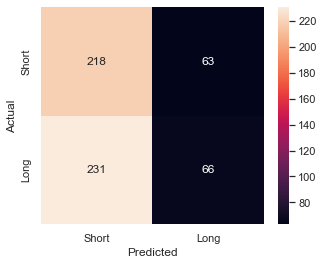

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Fiting the model and make predictions
cart_model = DecisionTreeClassifier(random_state=42)
cart_model.fit(X_train_scaled, Y_train)

Y_pred = cart_model.predict(X_test_scaled)

# Plotting Confustion matrix
cm = confusion_matrix(Y_test, Y_pred)
df1 = pd.DataFrame(cm, index=['Short', 'Long'], columns=['Short', 'Long'])
plt.figure(figsize=(5, 4))
sns.heatmap(df1, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

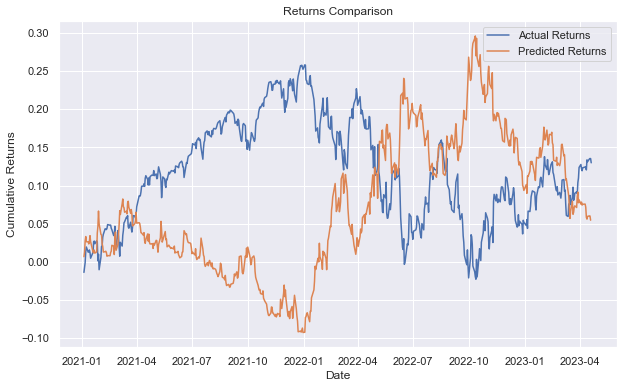

In [38]:
predicted_data = pd.DataFrame(index=testing_data.index)
predicted_data['Actual Returns'] = testing_data['LogReturn']
predicted_data['Predicted Returns'] = testing_data['LogReturn'].shift(-1) * Y_pred

plt.figure(figsize=(10, 6))
plt.plot(predicted_data['Actual Returns'].cumsum(), label='Actual Returns')
plt.plot(predicted_data['Predicted Returns'].cumsum(), label='Predicted Returns')

plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Returns Comparison')
plt.legend()
plt.show()

In [39]:
bnh_returns = predicted_data['Actual Returns'].cumsum()[-1]

predicted_data.dropna(inplace=True)

predicted_returns = predicted_data['Predicted Returns'].cumsum()[-1]

print(f"Buy-and-hold returns: {round(bnh_returns * 100, 2)}%")
print(f"Predicted returns: {round(predicted_returns * 100, 2)}%")


Buy-and-hold returns: 12.99%
Predicted returns: 5.47%


The buy-and-hold returns represent the percentage of profit or loss an investor would have earned by simply buying and holding the stock for the entire period. In this case, the buy-and-hold returns were 12.99%.

The predicted returns represent the percentage of profit or loss that the model predicted for the next day. For the DecisionTreeClassifier model, the predicted returns were 5.47%. The model also made 218 actual short signals and 66 actual long signals, while the rest of the signals were false predictions.

Overall, the model did not perform as well as the buy-and-hold strategy in terms of returns.

### Gradient Boosting :

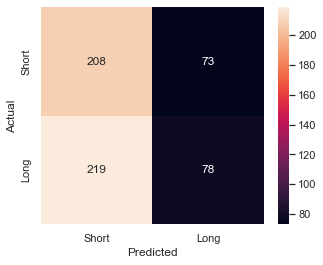

In [40]:
# Plot confusion matrix as a heatmap for the best model
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Fit the model and make predictions
gb_model = GradientBoostingClassifier(n_estimators=50,max_depth=3, random_state=42)
gb_model.fit(X_train_scaled, Y_train)

Y_pred = gb_model.predict(X_test_scaled)

# Plotting Confustion matrix
cm = confusion_matrix(Y_test, Y_pred)
df1 = pd.DataFrame(cm, index=['Short', 'Long'], columns=['Short', 'Long'])
plt.figure(figsize=(5, 4))
sns.heatmap(df1, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

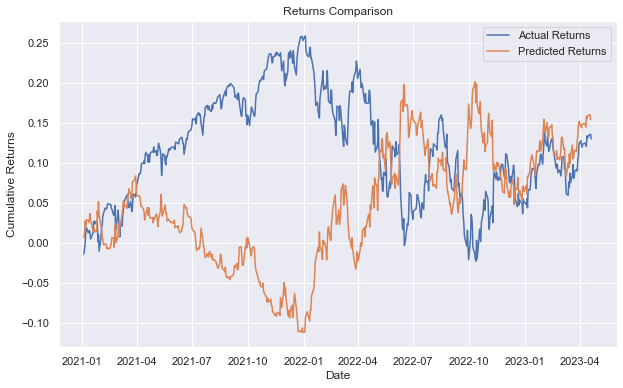

In [41]:
predicted_data = pd.DataFrame(index=testing_data.index)
predicted_data['Actual Returns'] = testing_data['LogReturn']
predicted_data['Predicted Returns'] = testing_data['LogReturn'].shift(-1) * Y_pred

plt.figure(figsize=(10, 6))
plt.plot(predicted_data['Actual Returns'].cumsum(), label='Actual Returns')
plt.plot(predicted_data['Predicted Returns'].cumsum(), label='Predicted Returns')

plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Returns Comparison')
plt.legend()
plt.show()

In [42]:
bnh_returns = predicted_data['Actual Returns'].cumsum()[-1]

predicted_data.dropna(inplace=True)

predicted_returns = predicted_data['Predicted Returns'].cumsum()[-1]

print(f"Buy-and-hold returns: {round(bnh_returns * 100, 2)}%")
print(f"Predicted returns: {round(predicted_returns * 100, 2)}%")

Buy-and-hold returns: 12.99%
Predicted returns: 15.41%


The buy-and-hold strategy yielded a return of 12.99% over the given period. However, the GradientBoostingClassifier model was able to predict the returns more accurately, with a predicted return of 15.41%. The model also gave 208 actual short signals and 78 actual long signals, indicating its effectiveness in predicting the market direction. This suggests that the GradientBoostingClassifier model was better than the other models in predicting the next day's returns of the SPY stock.

### SVM

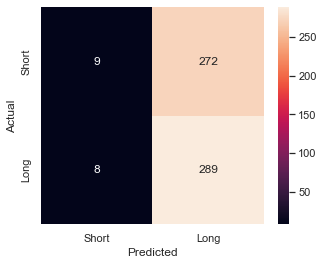

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.svm import SVC

# Fit the model and make predictions
svm_model = SVC(kernel='rbf', C=10, gamma=0.1, random_state=42)
svm_model.fit(X_train_scaled, Y_train)

Y_pred = svm_model.predict(X_test_scaled)

# Plotting Confustion matrix
cm = confusion_matrix(Y_test, Y_pred)
df1 = pd.DataFrame(cm, index=['Short', 'Long'], columns=['Short', 'Long'])
plt.figure(figsize=(5, 4))
sns.heatmap(df1, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

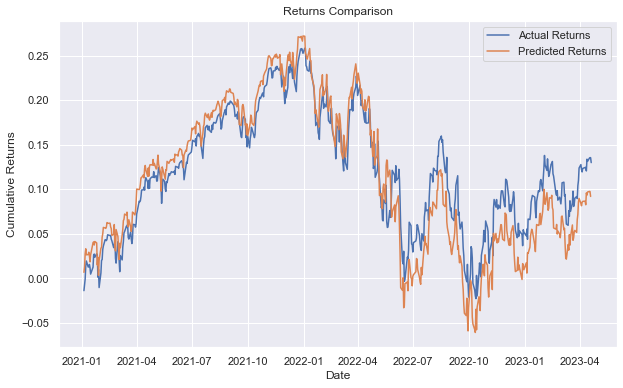

In [44]:
predicted_data = pd.DataFrame(index=testing_data.index)
predicted_data['Actual Returns'] = testing_data['LogReturn']
predicted_data['Predicted Returns'] = testing_data['LogReturn'].shift(-1) * Y_pred

plt.figure(figsize=(10, 6))
plt.plot(predicted_data['Actual Returns'].cumsum(), label='Actual Returns')
plt.plot(predicted_data['Predicted Returns'].cumsum(), label='Predicted Returns')

plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Returns Comparison')
plt.legend()
plt.show()

In [45]:
bnh_returns = predicted_data['Actual Returns'].cumsum()[-1]

predicted_data.dropna(inplace=True)

predicted_returns = predicted_data['Predicted Returns'].cumsum()[-1]

print(f"Buy-and-hold returns: {round(bnh_returns * 100, 2)}%")
print(f"Predicted returns: {round(predicted_returns * 100, 2)}%")

Buy-and-hold returns: 12.99%
Predicted returns: 9.2%


In the case of the SVM model, it predicted a return of 9.2%, which is the return that an investor would receive if they followed the trading signals generated by the model. The SVM model generated 9 actual short signals and 289 actual long signals, indicating that the model predicted that the SPY index would increase in value more often than decrease. However, it is important to note that the predicted returns of 9.2% are lower than the buy-and-hold returns of 12.99%, which indicates that the model may not be very effective at predicting the movements of the SPY index.

### _Conclusion_

1. Based on the analysis, the GradientBoostingClassifier was found to be the best performing model with an MCC score of 0.0074 and test error of 0.5087. However, it is important to note that the model still has some level of risk associated with it, as it showed a drawdown during the evaluation. Hence, it is important to carefully consider these factors before making investment decisions based on the model's predictions.

2. To further improve the models, we can consider using more advanced and sophisticated techniques such as neural networks, ensemble learning or deep learning. Additionally, instead of relying on technical indicators, we can also use more complex features such as trading strategies or portfolios that have already been calibrated to risk and reward measures. This can significantly improve the prediction probabilities and provide more reliable and accurate results.

3. Moreover, when evaluating the model, we need to consider various performance metrics such as MCC score, test error, average probability, precision, recall, and F1 score. It is also important to monitor the model's performance over time and make necessary adjustments to ensure that it continues to perform well and produce reliable predictions.

## Deployment :

- _Discuss how the result of the data mining will be deployed._

The results of data mining can be deployed in several ways, depending on the specific context and goals of the project. In the case of this project, the deployment of the results could involve integrating the selected model (in this case, the Gradient Boosting Classifier) into an investment strategy. The model could be used to generate buy or sell signals for the SPY ETF, based on the predicted returns for the next trading day. These signals could be used to inform trading decisions, either by individual investors or by investment firms.

One way to deploy the model is through an automated trading system that would execute trades based on the predicted signals. This would require integration with a broker's API or a trading platform, such as Interactive Brokers or MetaTrader. The trading system could be run on a server or a cloud-based platform, and it could be configured to execute trades automatically based on the predicted signals.

Another way to deploy the model is by using it as a tool for investment research. The model could be used to generate predictions for a range of assets and markets, and these predictions could be used to inform investment decisions. For example, the model could be used to generate signals for other ETFs, individual stocks, or even currencies and commodities. The predictions could be used in conjunction with other research tools, such as fundamental analysis, to generate investment ideas.

However, it is important to note that deploying the results of data mining comes with several ethical considerations. The use of predictive models in financial markets can be controversial, as it may raise questions about market manipulation and fairness. Additionally, there is always a risk of model failure or overfitting, which could lead to significant financial losses. Therefore, it is essential to evaluate the model's performance continuously and consider implementing risk management strategies, such as position sizing or stop-loss orders.

In conclusion, the results of data mining in this project can be deployed through an automated trading system or used as a tool for investment research. However, it is important to be aware of the ethical considerations and risks associated with using predictive models in financial markets.

- _Discuss any issues the firm should be aware of regarding deployment._

There are several issues that the firm should be aware of regarding the deployment of the data mining results:

- **Overfitting**: The models developed during data mining may have been trained too well on the available data, leading to overfitting. This means that the models may not perform well on new, unseen data, which can lead to poor performance in a real-world deployment scenario.
- **Data quality**: The performance of the models is highly dependent on the quality of the data used to train them. If the data is of poor quality, the models may not perform well in the real world, leading to poor investment decisions.
- **Model updates**: Financial markets are highly dynamic, and the models will need to be updated periodically to incorporate new data and changes in market conditions. The firm should have a plan in place for updating the models to ensure that they remain accurate and effective.
- **Regulatory compliance**: The firm must ensure that any investment decisions based on the results of the data mining are in compliance with applicable laws and regulations.
- **Ethical considerations**: The firm should be aware of any ethical considerations related to using data mining for investment decisions, such as potential biases in the data or the models.

Overall, the firm should carefully consider these issues when deploying the results of the data mining and ensure that appropriate measures are in place to mitigate any potential risks.

- _Are there critical ethical considerations?_

There are critical ethical considerations that should be taken into account when deploying a data mining model for investment decision-making. Some of the ethical considerations include:

- **Fairness**: The model should be fair to all stakeholders and not discriminate against any particular group of individuals. It is important to ensure that the model does not reinforce any biases or prejudices that may exist in the data.
- **Privacy**: The model should be designed in such a way that it does not violate the privacy of individuals. The data used for training the model should be collected and stored in accordance with applicable laws and regulations.
- **Transparency**: The model should be transparent, and the decision-making process should be easily understandable. It is important to ensure that the stakeholders are aware of how the model works and how the predictions are made.
- **Accountability**: The firm should be accountable for the decisions made based on the predictions of the model. It is important to have a mechanism in place to review the decisions made based on the predictions of the model and to take corrective action if necessary.
- **Security**: The data used for training the model should be secured against unauthorized access or disclosure. It is important to ensure that the model is not vulnerable to cyber-attacks or other security breaches.

Overall, the ethical considerations should be carefully considered and addressed when deploying a data mining model for investment decision-making.

- _Identify the risks associated with your proposed plan and how you would mitigate them._

There are several risks associated with the proposed plan:

- **Model risk**: The accuracy of the predictive models is dependent on the quality and relevance of the data used for training. There is always a risk that the models may not perform well on new or unforeseen data, leading to poor investment decisions. To mitigate this risk, it is important to regularly update the models with new data and perform ongoing testing and validation to ensure their accuracy.
- **Market risk**: The investment decisions based on the predictive models are subject to market risk, which includes economic factors, geopolitical events, and unexpected news events. These risks can result in significant losses or missed opportunities. To mitigate this risk, it is important to have a diversified portfolio that can withstand market volatility.
- **Technology risk**: The deployment of the predictive models requires advanced technology infrastructure and processes. There is a risk of technology failure, such as server downtime or cyber attacks, which can result in significant financial losses. To mitigate this risk, it is important to have strong security protocols and backup systems in place.
- **Ethical risk**: The use of predictive models for investment decisions raises ethical concerns, particularly around data privacy, bias, and transparency. There is a risk of unintentionally discriminating against certain groups or individuals, or using data in ways that violate privacy laws. To mitigate this risk, it is important to have robust data governance policies in place and to ensure that the models are transparent and explainable.

To mitigate these risks, it is important to have a comprehensive risk management strategy in place, which includes regular monitoring and review of the predictive models, ongoing testing and validation, diversification of the investment portfolio, strong technology infrastructure and security protocols, and ethical considerations and data governance policies.

## Bibliography:

- python - How to run Ta-Lib on multiple columns of a Pandas dataframe? - Stack Overflow.Available at:https://stackoverflow.com/questions/51712269/how-to-run-ta-lib-on-multiple-columns-of-a-pandas-dataframe
- TA-Lib: https://pypi.org/project/TA-Lib/
- 3.2.4.3.2. sklearn.ensemble.RandomForestRegressor — scikit-learn 0.20.3 documentation: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
- sklearn.model_selection.TimeSeriesSplit — scikit-learn 0.21.2 documentation: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html
- Sunden, A. 2008. Trading based on Classification and Regression Trees: https://www.math.kth.se/matstat/seminarier/reports/M-exjobb10/100308b.pdf
- Stock Trend Prediction using SVM: http://cs229.stanford.edu/proj2014/Xinjie%20Di,%20Stock%20Trend%20Prediction%20with%20Technical%20Indicators%20using%20SVM.pdf
-Python Software Foundation. (2021). Python Language Reference, version 3.10. Available at: https://docs.python.org/3/index.html